# Airbnb Data Visualization project

#### Airbnb is an online market place that enables individuals or small businesses to offer temporary housing, lodging and tourism experiences to travellers around the world.

#### In this project, we will be focusing mainly on the Quebec marketplace mainly cities of Montreal and Quebec. This project will help gain insights into this particular market. 

#### Data used in this project is primarily from this website: http://insideairbnb.com/get-the-data.html



### 1. Insights

#### In this data visualization project, we are going to be using python to organize the data in the format we want, and then finally create a dashboard in Power BI. We are also going to use the opportunity to figure out how to explore a geojson file in python.

#### Granularity: All data to be filtered by city or neighbourhood.

#### Datasets: listings.csv, reviews.csv, neighbourhoods.geojson

#### Insights we are going to show from data include: 
#### 1. How many listings, hosts, reviews, reviews/listing/month?
#### 2. How many listings per host, multiple or single listings? Top 10 hosts by number of listings. 
#### 3. Listings broken down by room type. 
#### 4. High availability vs low availability i.e. long term vs short term rentals.


### 2. Exploring and organizing data

##import libraries needed

import pandas as pd
import geopandas
import missingno as msn
import numpy as np

### 2.1 Montreal City Data

In [2]:
## import geojson data from url
url = "http://data.insideairbnb.com/canada/qc/montreal/2019-11-19/visualisations/neighbourhoods.geojson"
df = geopandas.read_file(url)

print(df)

                               neighbourhood neighbourhood_group  \
0                                  Outremont                None   
1                                    LaSalle                None   
2                                 Mont-Royal                None   
3                                Ville-Marie                None   
4                      Le Plateau-Mont-Royal                None   
5                                  Hampstead                None   
6                               Le Sud-Ouest                None   
7                              Montréal-Nord                None   
8   Rivière-des-Prairies-Pointe-aux-Trembles                None   
9                  Rosemont-La Petite-Patrie                None   
10                                   Lachine                None   
11                             Saint-Léonard                None   
12                                    Dorval                None   
13             L'Île-Bizard-Sainte-Geneviève    

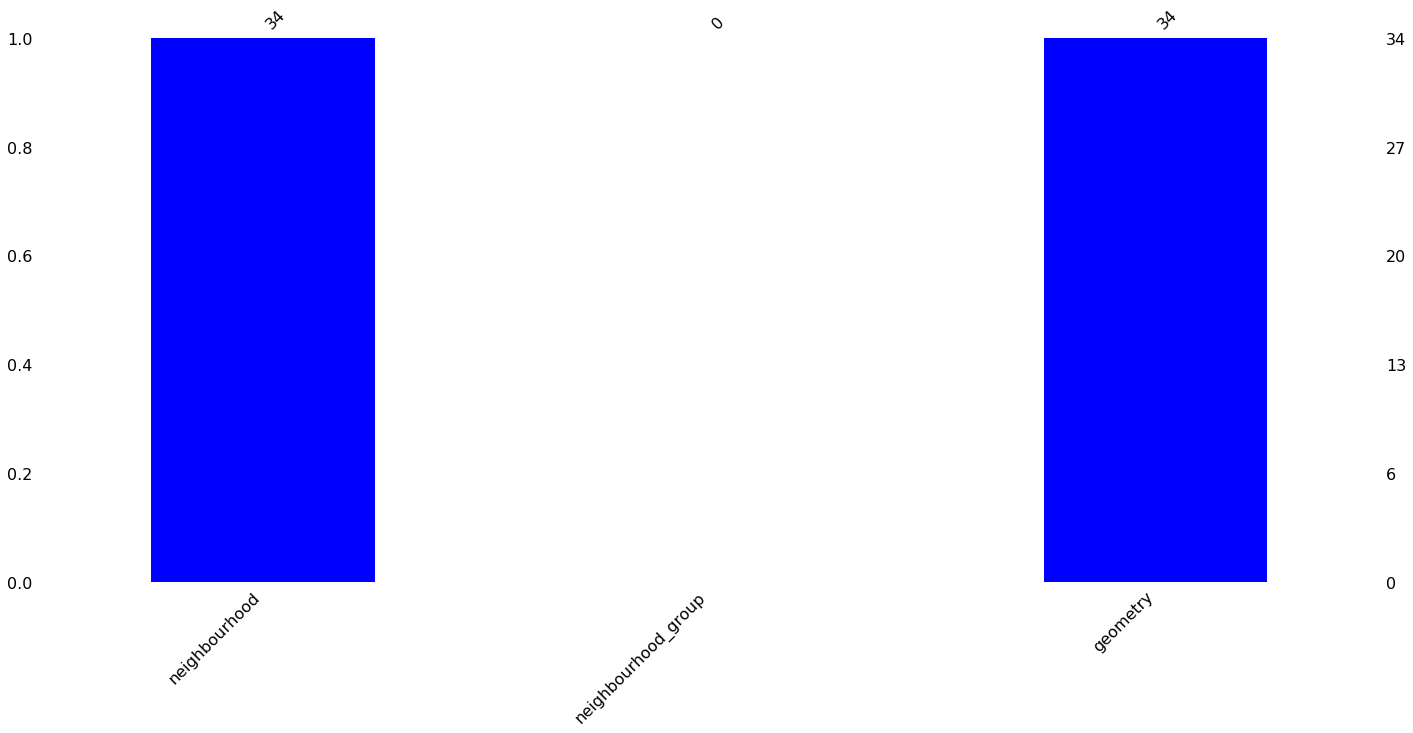

In [3]:
##  Use missingno library to check for missing data

msn.bar(df, color = 'blue')

In [4]:
## drop column "neighborhood group" 
montreal_nhdf = df.drop(['neighbourhood_group'], axis =1, inplace = False)

## perform check
montreal_nhdf.columns

Index(['neighbourhood', 'geometry'], dtype='object')

In [5]:
## Load montreal listings data
df1 = pd.read_csv(r"C:\Users\Emma\Documents\datasets\airbnbstats\montreal_listings.csv")
print (df1)

             id                                               name    host_id  \
0          2078                Central comfy close to Metro Laurie       2277   
1          2843                     Fabulous downtown/airport room       2319   
2         14584  Spread Out in 1,200 Square Feet of Luxury in t...      57358   
3         29059                       Lovely studio Quartier Latin     125031   
4         29061                 Maison historique - Quartier Latin     125031   
...         ...                                                ...        ...   
20170  40210972  Condo dtown Griffintown 2floors w private entr...  177557985   
20171  40211135  Luxury townhouse in convient, rich, safe commu...  308154543   
20172  40211453                 【路客】M251 @ Nordic Style,Ch电影节皇家停车场  304416571   
20173  40212993     Luxury condo in the heart of downtown Montreal  183589726   
20174  40213001                            Grand studio 2 Chambres  309123788   

      host_name  neighbourh

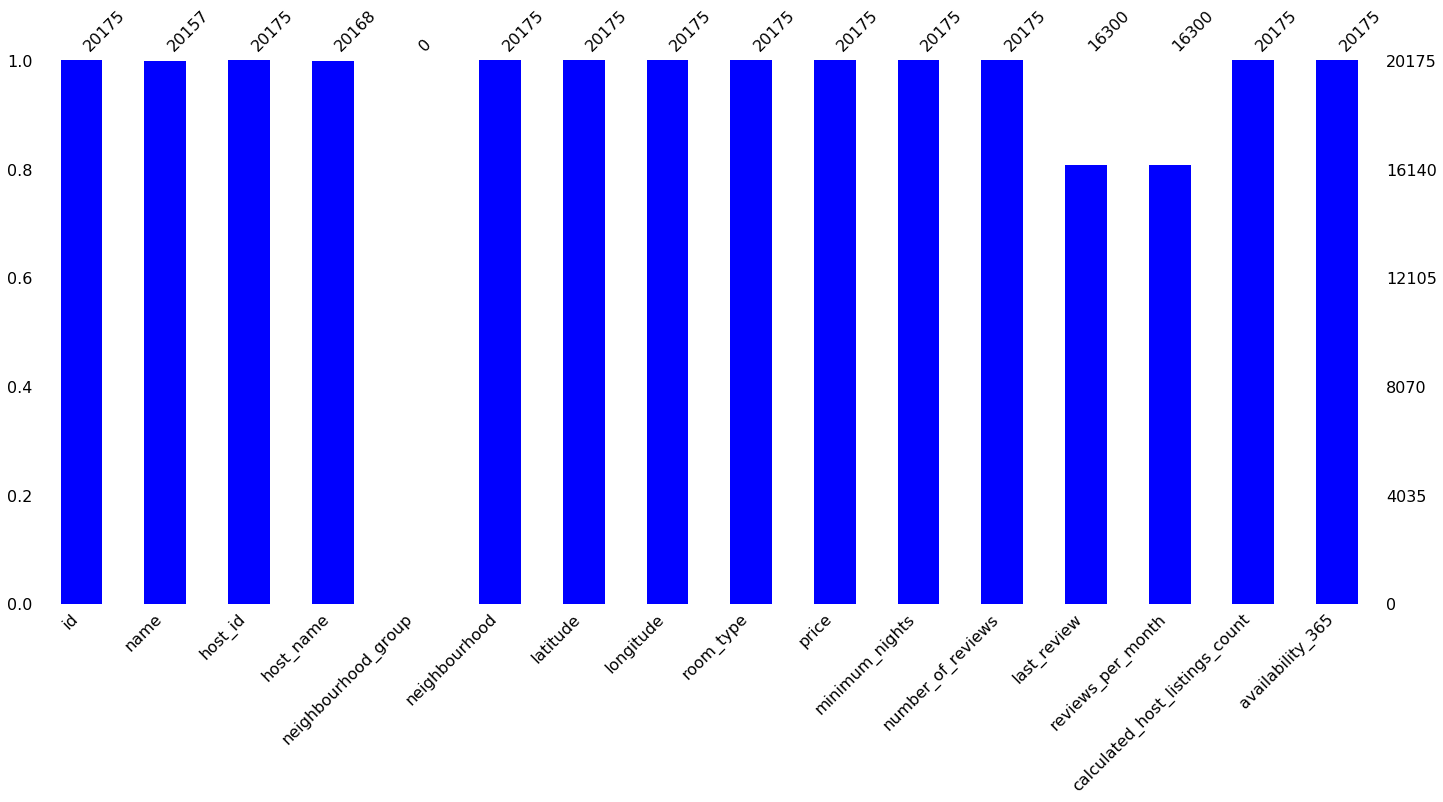

In [6]:
## using missingno library to check for missing data

msn.bar(df1, color = 'blue')

In [7]:
##replace null values with zero for reviews per month column
df1['reviews_per_month'] = df1['reviews_per_month'].fillna(0)

## drop column "neighborhood group" with no values
montreal_listingsdf = df1.drop(['neighbourhood_group'], axis =1, inplace = False)
montreal_listingsdf.tail(4)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
20171,40211135,"Luxury townhouse in convient, rich, safe commu...",308154543,Hong,Saint-Laurent,45.51086,-73.70037,Entire home/apt,108,3,0,NaN,0.0,2,83
20172,40211453,"【路客】M251 @ Nordic Style,Ch电影节皇家停车场",304416571,客,Ville-Marie,45.51040,-73.56128,Entire home/apt,79,1,0,NaN,0.0,8,333
20173,40212993,Luxury condo in the heart of downtown Montreal,183589726,Ali,Ville-Marie,45.49293,-73.57481,Entire home/apt,77,1,0,NaN,0.0,1,12
20174,40213001,Grand studio 2 Chambres,309123788,Dydy,Rosemont-La Petite-Patrie,45.56679,-73.58071,Entire home/apt,85,3,0,NaN,0.0,1,364


In [8]:
## Load montreal reviews data
df2 = pd.read_csv(r"C:\Users\Emma\Documents\datasets\airbnbstats\montreal_reviews.csv")
print (df2)

        listing_id        date
0             2078  2011-09-06
1             2078  2011-10-06
2             2078  2011-10-13
3             2078  2011-10-29
4             2078  2011-11-01
...            ...         ...
467092    40092224  2019-11-17
467093    40106320  2019-11-15
467094    40106320  2019-11-17
467095    40107243  2019-11-15
467096    40206250  2019-11-19

[467097 rows x 2 columns]


### 2.2 Quebec City Data

In [10]:
## import geojson data from url
url = "http://data.insideairbnb.com/canada/qc/quebec-city/2019-11-07/visualisations/neighbourhoods.geojson"
df3 = geopandas.read_file(url)

print(df3)

                                   neighbourhood neighbourhood_group  \
0                                   Loretteville                None   
1                                       Jésuites                None   
2                                   Quartier 5-1                None   
3                                    Saint-Louis                None   
4                                     Val-Bélair                None   
5                                   Quartier 4-6                None   
6                                   Quartier 5-4                None   
7                                     L'Aéroport                None   
8                            Duberger-Les Saules                None   
9                             Cité Universitaire                None   
10                    Neufchâtel-Est/Lebourgneuf                None   
11                                        Lairet                None   
12                                  Quartier 5-2                

In [11]:
## drop column "neighborhood group" with no values
quebec_nhdf = df3.drop(['neighbourhood_group'], axis =1, inplace = False)
print(quebec_nhdf)

                                   neighbourhood  \
0                                   Loretteville   
1                                       Jésuites   
2                                   Quartier 5-1   
3                                    Saint-Louis   
4                                     Val-Bélair   
5                                   Quartier 4-6   
6                                   Quartier 5-4   
7                                     L'Aéroport   
8                            Duberger-Les Saules   
9                             Cité Universitaire   
10                    Neufchâtel-Est/Lebourgneuf   
11                                        Lairet   
12                                  Quartier 5-2   
13                                 Saint-Sauveur   
14                                  Quartier 4-2   
15  Vieux-Québec/Cap-Blanc/Colline parlementaire   
16                                       Plateau   
17                                   Des Châtels   
18          

In [12]:
## Load quebec listings data
df4 = pd.read_csv(r"C:\Users\Emma\Documents\datasets\airbnbstats\quebec_listings.csv")
print (df4)

            id                                               name    host_id  \
0        54334  Beau logement avec vue magnifique sur les mont...     254811   
1       138381                      Bed & Breakfast La California     675584   
2       198548                   Fabulous view in heart of Québec     960772   
3       214967                                  Au bord du fleuve    1110010   
4       268812                    Apartment Old city Quebec condo    1408583   
...        ...                                                ...        ...   
2699  39923181         Charmant appartement au coeur de Québec !!   91482133   
2700  39923743                Beau loft bien situé et confortable   17525677   
2701  39928228                    Appartement Québec Centre-ville  307739787   
2702  39928684     Appartement à quelques minutes du vieux Québec  307739787   
2703  39942561    ♚ Luxury home for 6 in Old Quebec with parking!  307893148   

      host_name  neighbourhood_group  \

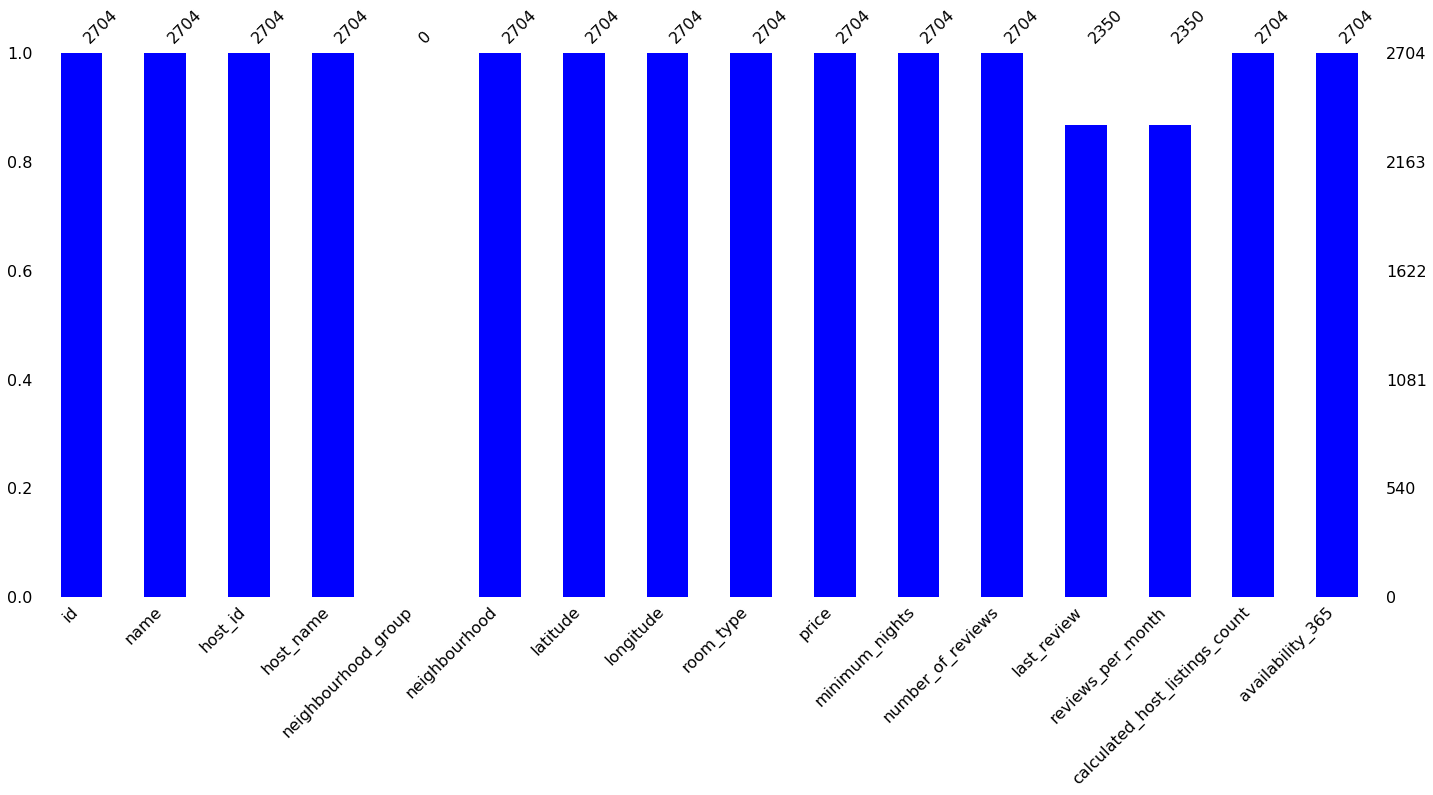

In [14]:
## to check missing data

msn.bar(df4, color = 'blue')

In [15]:
##replace null values with zero for reviews per month column
df4['reviews_per_month'] = df4['reviews_per_month'].fillna(0)

## drop column "neighborhood group" with no values

quebec_listingsdf = df4.drop(['neighbourhood_group'], axis =1, inplace = False)
quebec_listingsdf.tail(4)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2700,39923743,Beau loft bien situé et confortable,17525677,Eric,Saint-Sauveur,46.80729,-71.23854,Entire home/apt,40,1,0,NaN,0.0,3,173
2701,39928228,Appartement Québec Centre-ville,307739787,Francis,Saint-Sauveur,46.80773,-71.22964,Entire home/apt,40,1,0,NaN,0.0,2,87
2702,39928684,Appartement à quelques minutes du vieux Québec,307739787,Francis,Saint-Sauveur,46.80773,-71.22964,Entire home/apt,40,2,0,NaN,0.0,2,60
2703,39942561,♚ Luxury home for 6 in Old Quebec with parking!,307893148,Michael,Montcalm,46.80425,-71.22831,Entire home/apt,159,1,0,NaN,0.0,1,39


In [16]:
df5 = pd.read_csv(r"C:\Users\Emma\Documents\datasets\airbnbstats\quebec_reviews.csv")
print (df5)

        listing_id        date
0            54334  2011-07-15
1            54334  2011-07-19
2            54334  2011-08-02
3            54334  2013-08-02
4            54334  2013-08-12
...            ...         ...
115533    39666910  2019-11-01
115534    39675474  2019-11-03
115535    39725541  2019-11-03
115536    39772255  2019-11-03
115537    39812603  2019-11-03

[115538 rows x 2 columns]


### 2.3 Create new dataframes and upload

In [17]:
###Combine both dataframes for Quebec city and Montreal City data together in one dataframe for Quebec Province
QuebecListingFrame = [montreal_listingsdf, quebec_listingsdf]

result = pd.concat(QuebecListingFrame, keys=['Montreal', 'Quebec'])


QuebecReviewFrame = [df2, df5]

result1 = pd.concat(QuebecReviewFrame, keys=['Montreal', 'Quebec'])

## Send dataframes to one excel workbook in separate sheets
with pd.ExcelWriter(r"C:\Users\Emma\Documents\Github folder\airbnb project\QuebecAirBnB.xlsx") as writer:  
    result.to_excel(writer, sheet_name='Quebec_Listings')
    result1.to_excel(writer, sheet_name='Quebec_Reviews')

In [18]:
QuebecNHFrame = [montreal_nhdf, quebec_nhdf]

result2 = pd.concat(QuebecNHFrame, keys=['Montreal', 'Quebec'])

##send the dataframe created with geopandas to shapefile
result2.to_file(r'C:\Users\Emma\Documents\Github folder\airbnb project\QBNeighbourhood.shp', driver = 'ESRI Shapefile')


## 3. Data Visualization 

#### The excel workbook and shapefile can now be explored in Tableau to generate the required data visualizations. However in the case of our Power BI visualization, we will be loading the geojson file directly from the url. 
#### Data visualizations were created using Power BI and snapshot in pdf format is shown below.

In [23]:
### Display Power BI visualization created and exported to pdf 

from IPython.display import IFrame
IFrame(r"C:\Users\Emma\Documents\Github folder\airbnb project\Inside AirBnB data - Quebec.pdf", width=900, height=600)

### 4. Conclusions

#### 1. Airbnb in Quebec is been used for both short and long term rentals.
#### 2. Most of Airbnb listings are entire home/apts.
#### 3. Airbnb listings are offered by both individuals and businesses. Over 40% of listings are owned by hosts that have multiple listings.  The top 10 hosts have anywhere from 28 - 160 listings.